# Relax challenge 

#### The data is available as two attached CSV files: 

takehome_user_engagement. csv

takehome_users . csv

#### The data has the following two tables:

1) A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years. This table includes:

● name: the user's name

● object_id: the user's id

● email: email address

● creation_source: how their account was created. This takes on one of 5 values:

    ○ PERSONAL_PROJECTS: invited to join another user's personal workspace
    ○ GUEST_INVITE: invited to an organization as a guest (limited permissions)
    ○ ORG_INVITE: invited to an organization (as a full member)
    ○ SIGNUP: signed up via the website
    ○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
    
● creation_time: when they created their account

● last_session_creation_time: unix timestamp of last login

● opted_in_to_mailing_list: whether they have opted into receiving marketing emails

● enabled_for_marketing_drip: whether they are on the regular marketing email drip

● org_id: the organization (group of users) they belong to

● invited_by_user_id: which user invited them to join (if applicable).

2) A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product. 

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period , identify which factors predict future user adoption. We suggest spending 12 hours on this, but you're welcome to spend more or less. 

Please send us a brief writeup of your findings (the more concise, the better no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

# A) Takehome user engagement

In [1]:
#import packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

In [2]:
#read csv file into dataframe
df = pd.read_csv(r'takehome_user_engagement.csv')

In [3]:
#basic understanding of the dataframe
df.shape
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
#Pass the time_stamp from an object type to date time for analysis purposes
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
#confirm the change has been made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [5]:
#Set index equal to time stamp and Resample the dataframe 
df = df.set_index('time_stamp')
df = df.groupby('user_id').resample('1W').sum()

In [6]:
# df = df.dropna()
df = df[df['user_id'] != 0]
df['adopted_user'] = [x for x in df['visited']>2]
df['adopted_user'] = df['adopted_user'].astype(int)  
df['clean_user_id'] = df['user_id']/df['visited']
df['clean_user_id'] = df['clean_user_id'].astype(int)
adopted_users = df[df['adopted_user']==1]
adopted_users.head()
# user_ids = [x for x in unique_user_ids]
# user_ids = pd.DataFrame(user_ids, columns=['clean_user_id'])
# user_ids.head()
# user_ids['adopted_user'] = sum(df['adopted_user'])
#this is the list of adopted users

user_id  visited  adopted_user  clean_user_id
user_id time_stamp                                               
2       2014-02-09        6        3             1              2
10      2013-03-03       30        3             1             10
        2013-04-14       30        3             1             10
        2013-04-28       30        3             1             10
        2013-05-05       40        4             1             10

# B) Takehome Users

In [7]:
#read csv file into dataframe
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1')
# df_users.head()
df_users.tail(30)
# df_users.sample(n=30, random_state=1)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
11970,11971,2013-05-04 06:54:23,Ferreira Beatrice,BeatriceBarbosaFerreira@yahoo.com,GUEST_INVITE,NaN,0,0,3,11854.0
11971,11972,2012-09-13 23:23:11,Penington Jamie,JamiePenington@yahoo.com,ORG_INVITE,NaN,0,0,16,7012.0
11972,11973,2012-10-30 03:09:47,Simmons Thomas,ThomasSimmons@gmail.com,PERSONAL_PROJECTS,NaN,0,0,52,NaN
11973,11974,2012-12-26 16:42:08,Scott James,JamesJScott@gmail.com,SIGNUP,1.356713e+09,0,0,167,NaN
11974,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0
11975,11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,248,NaN
11976,11977,2013-09-17 18:58:51,Crary Joshua,JoshuaHCrary@gmail.com,SIGNUP_GOOGLE_AUTH,1.379704e+09,0,0,144,NaN
11977,11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,NaN,1,0,29,NaN
11978,11979,2013-01-28 09:26:33,Hurst Harley,HarleyHurst@yahoo.com,SIGNUP,1.359624e+09,0,0,2,NaN
11979,11980,2014-02-02 15:23:18,Gloeckner Franziska,ljnnbqdr@cgbld.com,ORG_INVITE,1.397835e+09,0,0,406,3068.0


In [8]:
#join the "Adopted User" variable
df_users = df_users.rename(columns={"object_id": "clean_user_id"})
df_final = pd.merge(df_users,adopted_users[['clean_user_id','adopted_user']], how='left', left_on='clean_user_id',right_on='clean_user_id')
df_final.tail(30)
df_final = df_final.drop_duplicates()
df_final.head()

,clean_user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN


In [9]:
df_final['adopted_user'] = df_final['adopted_user'].fillna(0)
df_final.head()

,clean_user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [10]:
df_final = pd.get_dummies(df_final, columns=['creation_source','opted_in_to_mailing_list'], drop_first=True)
df_final.head()

,clean_user_id,creation_time,name,email,last_session_creation_time,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list_1
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,0,11,10803.0,0.0,0,0,0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,1,316.0,1.0,1,0,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,94,1525.0,0.0,1,0,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,1,5151.0,0.0,0,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,193,5240.0,0.0,0,0,0,0,0


(array([10555.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1445.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

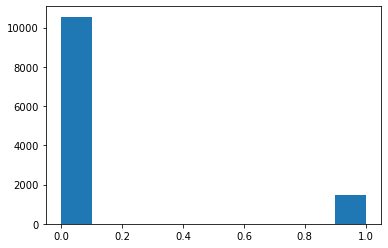

In [11]:
import matplotlib.pyplot as plt
plt.hist(df_final.adopted_user)

Given that this data is unbalanced we will need to oversample the data to ensure that we have a dataset that is evenly spread. Currently the relationship between the adopted users and the unadopted users is roughly 5:1, therefore to ensure that our model is learning using balanced data we will use SMOTE (Synthetic Minority Oversampling Technique)

In [12]:
# check version number
import imblearn
print(imblearn.__version__)

0.7.0


In [16]:
# We will count the number of 1s and 0s in our dependent variable
df_final.adopted_user.value_counts()

0.0    10555
1.0     1445
Name: adopted_user, dtype: int64

In [38]:
# We will make a dataframe with only numerical values
df_analysis = df_final[['last_session_creation_time','enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'adopted_user', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'opted_in_to_mailing_list_1']]
df_analysis.head()
y = df_analysis['adopted_user'].fillna(0)
X = df_analysis.loc[:, df_analysis.columns !='adopted_user'].fillna(0)

In [39]:
# Use SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

(array([10555.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10555.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

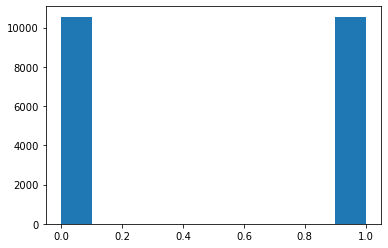

In [40]:
# Verify the change has been made
plt.hist(y)

In [41]:
# Split the data into train and test groups
from sklearn.model_selection import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X.values,y.values,random_state=42)

In [43]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(Xlr)
X_train_scaled=scaler.transform(Xlr)
X_test_scaled=scaler.transform(Xtestlr)


clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train_scaled, ylr)
# Print the accuracy from the testing data.
print("The logistic regression accuracy score is "+
      str(accuracy_score(clf.predict(X_test_scaled), ytestlr)))

The logistic regression accuracy score is 0.8654793482379689


In [44]:
# Use the function below for logistic regression optimization
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [45]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print("The logistic regression score without data scaling is "+str(score))

The logistic regression score without data scaling is 0.6508330838333805


In [48]:
#the grid of parameters to search over
Cs = [0.01, 0.1, 1, 5, 7.5, 10, 20, 30, 100, 1000]

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
best_score = 0

# your turn
for x in Cs:
    clf = LogisticRegression(C=x)
    score = cv_score(clf, X_train_scaled, ylr)
    print(x, score)
    if score > best_score:
        best_score = score
        ideal_x = x
        
print("The ideal C value is "+str(ideal_x)+" with a score of "+str(best_score))

0.01 0.7774127775757621
0.1 0.7933932146518075
1 0.8593357230807837
5 0.8647042373369882
7.5 0.8652726185088209
10 0.865335769756058
20 0.8653989010565966
30 0.8650199337330786
100 0.8650830650336172
1000 0.8647672489573361
The ideal C value is 20 with a score of 0.8653989010565966


In [49]:
# Use the optimal C parameter to run our logistic regression
scaler = preprocessing.StandardScaler().fit(Xlr)
X_train_scaled=scaler.transform(Xlr)
X_test_scaled=scaler.transform(Xtestlr)


clf = LogisticRegression(C=20)
# Fit the model on the trainng data.
clf.fit(X_train_scaled, ylr)
# Print the accuracy from the testing data.
print("The logistic regression accuracy score is "+
      str(accuracy_score(clf.predict(X_test_scaled), ytestlr)))

The logistic regression accuracy score is 0.8705949223190602


In [54]:
# feature importance for logistic regression
feature_names = X.columns
importance = clf.fit(X_train_scaled, ylr).coef_[0]
#summarize feature importance
for i, v in enumerate(importance):
    print('Feature: '+feature_names[i]+' Score: %.5f' % (v))

Feature: last_session_creation_time Score: 42.81843
Feature: enabled_for_marketing_drip Score: -0.20830
Feature: org_id Score: 0.16662
Feature: invited_by_user_id Score: -0.42767
Feature: creation_source_ORG_INVITE Score: -0.86843
Feature: creation_source_PERSONAL_PROJECTS Score: -0.95748
Feature: creation_source_SIGNUP Score: -1.00798
Feature: creation_source_SIGNUP_GOOGLE_AUTH Score: -0.87433
Feature: opted_in_to_mailing_list_1 Score: -0.26544


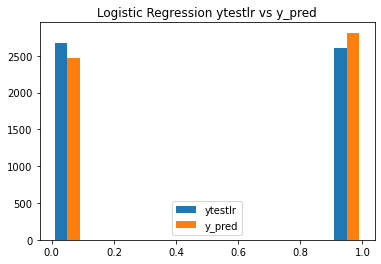

In [56]:
y_pred = clf.predict(X_test_scaled)
colors = ['ytestlr','y_pred']
plt.hist([ytestlr,y_pred], stacked=False, label=colors)
plt.title("Logistic Regression ytestlr vs y_pred")
plt.legend(prop={'size': 10})
plt.show()

## Findings and Conclusion
After performing some exploratory data analysis on our dependent variable, subsequently oversampling the data to account for the data imbalance and scaling our explanatory variables, we were able to run a logistic regression model. After running our logistic regression some of our prelminary findings were the following.
- The accuracy of our logistic regression model is around 87% after performing data cleaning and scaling
- The optimal parameter for our logistic regression model after performing parameter optimization was a C value of 20
- The most important feature in determining whether or not a user would be adopted into the platform was the variable 'last_session_creation_time' which shows when the user was last active. This intuitively makes sense since a user that hasn't logged in for a long time would not even be considered to be an 'adopted user' (these two variables are inherently co-dependent) 
- Lastly, the reason behind why a user created an account was not a determinant for user adoption

## Further Analysis
Given that our logistic regression's results showed a high reliance on "last_session_creation_time" to determine whether a user was adopted into the platform or not, and the fact that these two variables are inherently correlated (since our dependent variable was created using this explanatory variable) if we were to perform some subsequent analyses on this dataset it would be very useful to have some other explanatory variables such as user demographics behind our model. 

For example, we could source demographics such as a user's age from say a data provider such as Facebook, or a user's geographic location based on their log in IP address. It is important for us to have more variables that are completely independent from our explanatory variable since that will ensure its explanatory power will be higher whenever we use out of the sample data. 